# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alfina Azaria
- **Email:** alfinazaria32@gmail.com
- **ID Dicoding:** alfina_azaria_3TLG

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Di bulan apakah sepeda paling banyak dirental?
- Pertanyaan 2 : Di musim apakah sepeda paling banyak dirental?
- Pertanyaan 3 : Di hari apakah sepeda paling banyak dirental?
- Pertanyaan 4 : Apakah cuaca mempengaruhi jumlah sepeda yang dirental?
- Pertanyaan 5 : Bagaimana temperatur mempengaruhi jumlah sepeda yang dirental?

## Import Semua Packages/Library yang Digunakan

In [97]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

## Data Wrangling

### Gathering Data

In [77]:
# Reading day.csv
df_day = pd.read_csv("./data/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [78]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [79]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [80]:
# Check for missing values
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [81]:
# Check for duplicates
print("Jumlah duplikasi data:", df_day.duplicated().sum())

Jumlah duplikasi data: 0


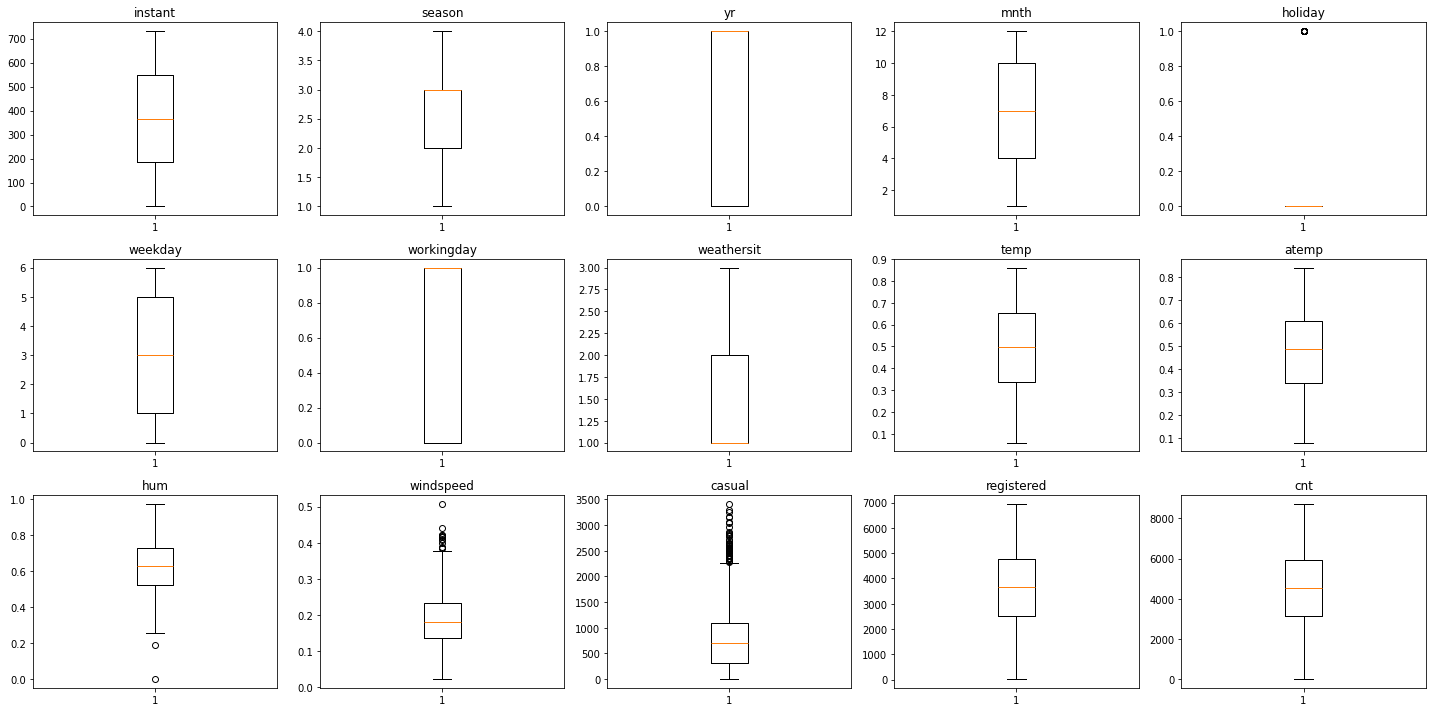

In [82]:
# Check for outliers per column

# But exclude dteday column
df_day_copy = df_day.drop(columns=['dteday'])

# Set figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Create subplots
fig, axs = plt.subplots(3, 5)

# Iterate through each column in the DataFrame
idx = 0
for col in df_day_copy.columns:
    if idx < 15:  # Limit to 5 rows and 3 columns
        # Calculate subplot indices
        row_index = idx // 5
        col_index = idx % 5
        
        # Plot boxplot
        axs[row_index, col_index].boxplot(df_day_copy[col][~np.isnan(df_day_copy[col])])
        axs[row_index, col_index].set_title(col)
        
        idx += 1

# Adjust layout
plt.tight_layout()

plt.show()

### Cleaning Data

In [83]:
# Convert 'dteday' to datetime format
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Now 'column_name' is in datetime format
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore Bike Sharing Dataset (Day)

In [84]:
# Frekuensi Rental setiap tahun

# Group by year and sum the counts
yearly_counts = df_day.groupby('yr')['cnt'].sum()

# Display the count of bike rental per month
print(yearly_counts)

yr
0    1243103
1    2049576
Name: cnt, dtype: int64


In [85]:
# Frekuensi Rental per Month
# Group by month and sum the counts
monthly_counts = df_day.groupby('mnth')['cnt'].sum().sort_values(ascending=False)

# Display the count of bike rental per month
print(monthly_counts)

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64


In [86]:
# Frekuensi Rental per Musim
# Group by month and sum the counts
monthly_counts = df_day.groupby('season')['cnt'].sum().sort_values(ascending=False)

# Display the count of bike rental per month
print(monthly_counts)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64


In [87]:
# Perbandingan jumlah casual users vs registered users
# Sum up counts of registered and casual users
registered_total = df_day['registered'].sum()
casual_total = df_day['casual'].sum()

# Print the total counts of registered and casual users
print("Total count of registered users:", registered_total)
print("Total count of casual users:", casual_total)

Total count of registered users: 2672662
Total count of casual users: 620017


In [88]:
# Perbandingan rental sepeda di hari kerja vs hari libur

# Create a new column to classify days as weekday or weekend/holiday
df_day['day_type'] = df_day.apply(lambda row: 'Weekend/Holiday' if row['holiday'] == 1 or row['weekday'] >= 5 else 'Weekday', axis=1)

# Group by day_type and sum the counts
rentals_by_day_type = df_day.groupby('day_type')['cnt'].sum()

# Print the total counts of bike rentals for weekday and weekend/holiday
print("Total count of bike rentals on weekdays:", rentals_by_day_type['Weekday'])
print("Total count of bike rentals on weekends/holidays:", rentals_by_day_type['Weekend/Holiday'])


Total count of bike rentals on weekdays: 2255141
Total count of bike rentals on weekends/holidays: 1037538


## Visualization & Explanatory Analysis

### Pertanyaan 1: Di bulan apakah sepeda paling banyak dirental?

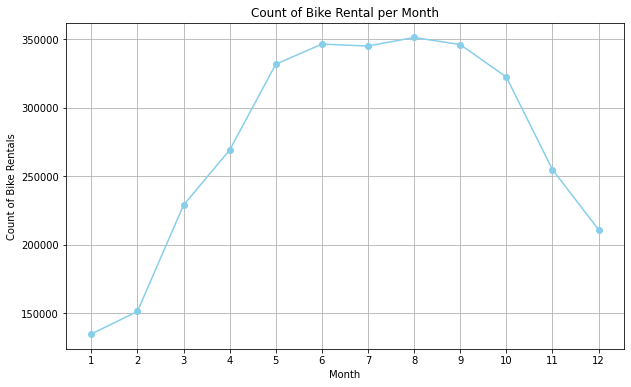

In [89]:
# Group by month and sum the counts
monthly_counts = df_day.groupby('mnth')['cnt'].sum()

# Plot the count of bike rental per month using a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='skyblue', linestyle='-')

# Set title and labels
plt.title('Count of Bike Rental per Month')
plt.xlabel('Month')
plt.ylabel('Count of Bike Rentals')

# Set xticks to represent months
plt.xticks(monthly_counts.index)

# Show plot
plt.grid(True)
plt.show()

### Pertanyaan 2: Di musim apakah sepeda paling banyak dirental?

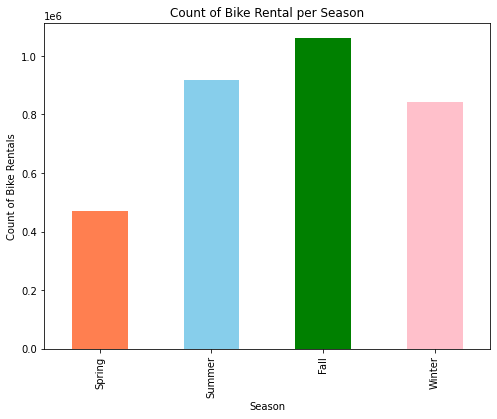

In [90]:
# Group by season and sum the counts
seasonal_counts = df_day.groupby('season')['cnt'].sum()

# Define a custom color palette
colors = ['coral', 'skyblue', 'green', 'pink']

# Plot the count of bike rental per season using a bar plot with custom colors
plt.figure(figsize=(8, 6))
seasonal_counts.plot(kind='bar', color=colors)

# Set title and labels
plt.title('Count of Bike Rental per Season')
plt.xlabel('Season')
plt.ylabel('Count of Bike Rentals')

# Set xticks to represent seasons
plt.xticks(range(0, 4), labels=['Spring', 'Summer', 'Fall', 'Winter'])

# Show plot
plt.show()

### Pertanyaan 3: Di hari apakah sepeda paling banyak dirental?

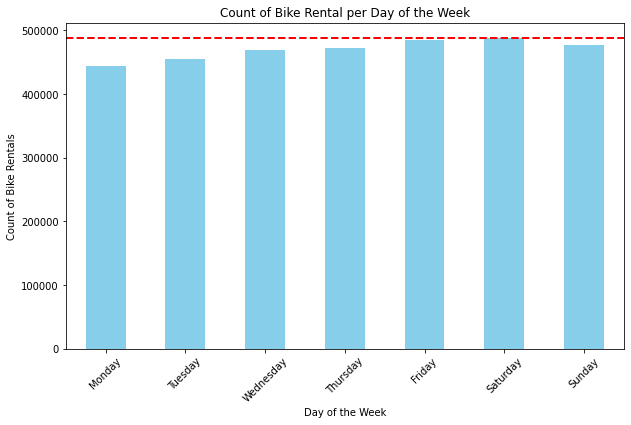

In [91]:
# Group by weekday and sum the counts
daily_counts = df_day.groupby('weekday')['cnt'].sum()

# Plot the count of bike rentals per day of the week using a bar plot
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='skyblue')

# Find the day(s) with the maximum count of bike rentals
max_count = daily_counts.max()

# Highlight the day(s) with the maximum count of bike rentals by drawing a horizontal line
plt.axhline(y=max_count, color='red', linestyle='--', linewidth=2)

# Set title and labels
plt.title('Count of Bike Rental per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Bike Rentals')

# Set xticks to represent days of the week
plt.xticks(range(0, 7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)

# Show plot
plt.show()

### Pertanyaan 4: Apakah cuaca mempengaruhi jumlah sepeda yang dirental?

In [92]:
# Get all unique values of the 'weathersit' column
unique_weathersit = df_day['weathersit'].unique()

# Print the unique values
print("Unique values of 'weathersit' column:")
print(unique_weathersit)

Unique values of 'weathersit' column:
[2 1 3]


From the information above, we know that people don't rent bikes on Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather

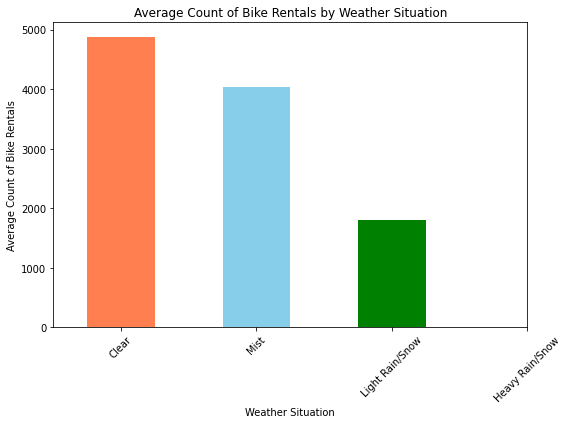

In [93]:
# Group by weathersit and calculate the average count of bike rentals
weather_counts = df_day.groupby('weathersit')['cnt'].mean()

# Define a custom color palette
colors = ['coral', 'skyblue', 'green', 'pink']

# Plot the average count of bike rentals for each weather situation using a bar plot
plt.figure(figsize=(8, 6))
weather_counts.plot(kind='bar', color=colors)

# Set title and labels
plt.title('Average Count of Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Count of Bike Rentals')

# Set xticks to represent weather situations
plt.xticks(range(0, 4), labels=['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'], rotation=45)

# Show plot
plt.tight_layout()
plt.show()

### Pertanyaan 5: Bagaimana temperatur mempengaruhi jumlah sepeda yang dirental?

In [94]:
# Get summary statistics for the 'temp' column
temp_summary = df_day['temp'].describe()

# Print the summary statistics
print("Summary statistics for temperature:")
print(temp_summary)

Summary statistics for temperature:
count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64


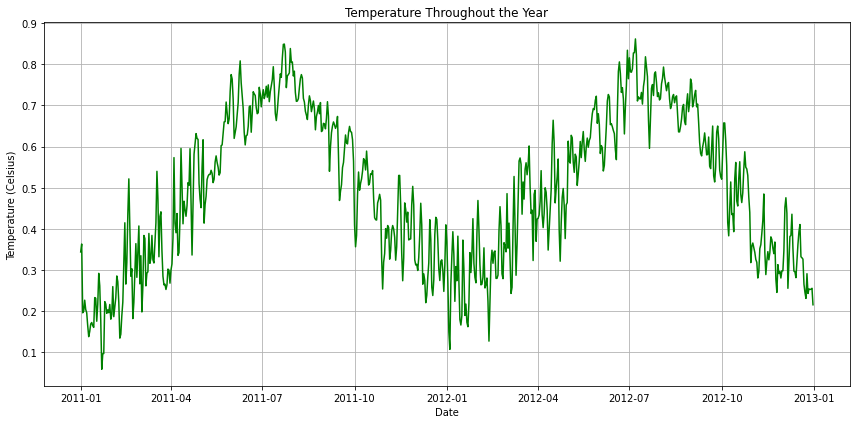

In [95]:
# EDA : Temperature throughout the year

# Plot the temperature throughout the year using a line plot
plt.figure(figsize=(12, 6))
plt.plot(df_day['dteday'], df_day['temp'], color='green')

# Set title and labels
plt.title('Temperature Throughout the Year')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

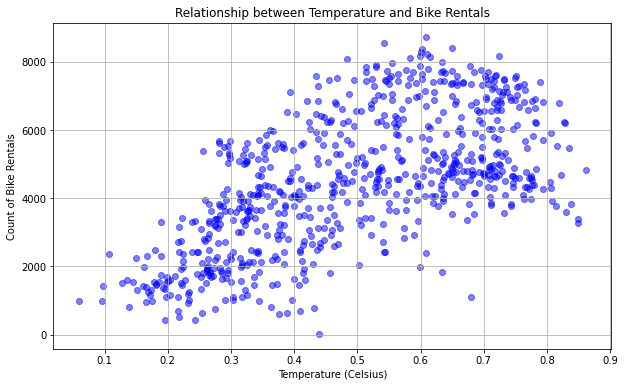

In [96]:
# Plot the relationship between temperature and bike rentals using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_day['temp'], df_day['cnt'], color='blue', alpha=0.5)

# Set title and labels
plt.title('Relationship between Temperature and Bike Rentals')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Count of Bike Rentals')

# Show plot
plt.grid(True)
plt.show()

## Conclusion

### Conclusion Pertanyaan 1: "Di bulan apakah sepeda paling banyak dirental?"
- Sepeda paling banyak dirental di bulan Agustus. Kemudian disusul oleh bulan Juni, lalu September.
- Secara keseluruhan, rata-rata sepeda banyak dirental di periode antara bulan Mei hingga Oktober

### Conclusion Pertanyaan 2: "Di musim apakah sepeda paling banyak dirental?"
- Sepeda paling banyak dirental di Musim Gugur. Kemudian disusul oleh Musim Panas, Salju, dan terakhir Musim Semi.

### Conclusion Pertanyaan 3: "Di hari apakah sepeda paling banyak dirental?"
- Sepeda paling banyak dirental di hari Sabtu. Kemudian disusul oleh hari Jumat, dan lalu hari Minggu.

### Conclusion Pertanyaan 4: "Apakah cuaca mempengaruhi jumlah sepeda yang dirental?"
- Iya, cuaca mempengaruhi jumlah sepeda yang dirental
- Sepeda paling banyak dirental pada saat cuaca Cerah. Dan kemudian diikuti oleh cuaca mendung, lalu saat cuaca hujan atau salju ringan
- Tidak terdapat record rental sepeda pada saat hujan atau salju lebat


### Conclusion Pertanyaan 5: "Bagaimana temperatur mempengaruhi jumlah sepeda yang dirental?"
- Berdasarkan scatterplot di atas, dapat dilihat bahwa rental sepeda cenderung lebih banyak saat keadaan temperatur yang lebih hangat atau panas. Dengan frekuensi rental sepeda paling tinggi pada saat temperatur ±24 celcius (41*0.6 celcius)